In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading the synthetic rooftop PV dataset and site details file associated with it

input_df = pd.read_csv("Input_data/synthetic_rooftop_data.gz", compression='gzip')
input_df.index = pd.to_datetime(input_df["t_stamp_utc"])
input_df = input_df.drop(columns=["t_stamp_utc"])
site_details_df = pd.read_csv("Input_data/site_details.csv", index_col=0)
all_sites = site_details_df.index

In [5]:
# Reading the data of WPE over time

wpe_over_time_df = pd.read_pickle("Processed_data/WPE_over_one_Year_windows_of60days_6_10min.pkl")

C:\Users\a1792406\AppData\Local\Temp/ipykernel_3024/2783529512.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axes.xaxis.set_ticklabels(['Mar-19', '', 'May-19', '', 'Jul-19', '', 'Sep-19', '', 'Nov-19', '', 'Jan-20'])


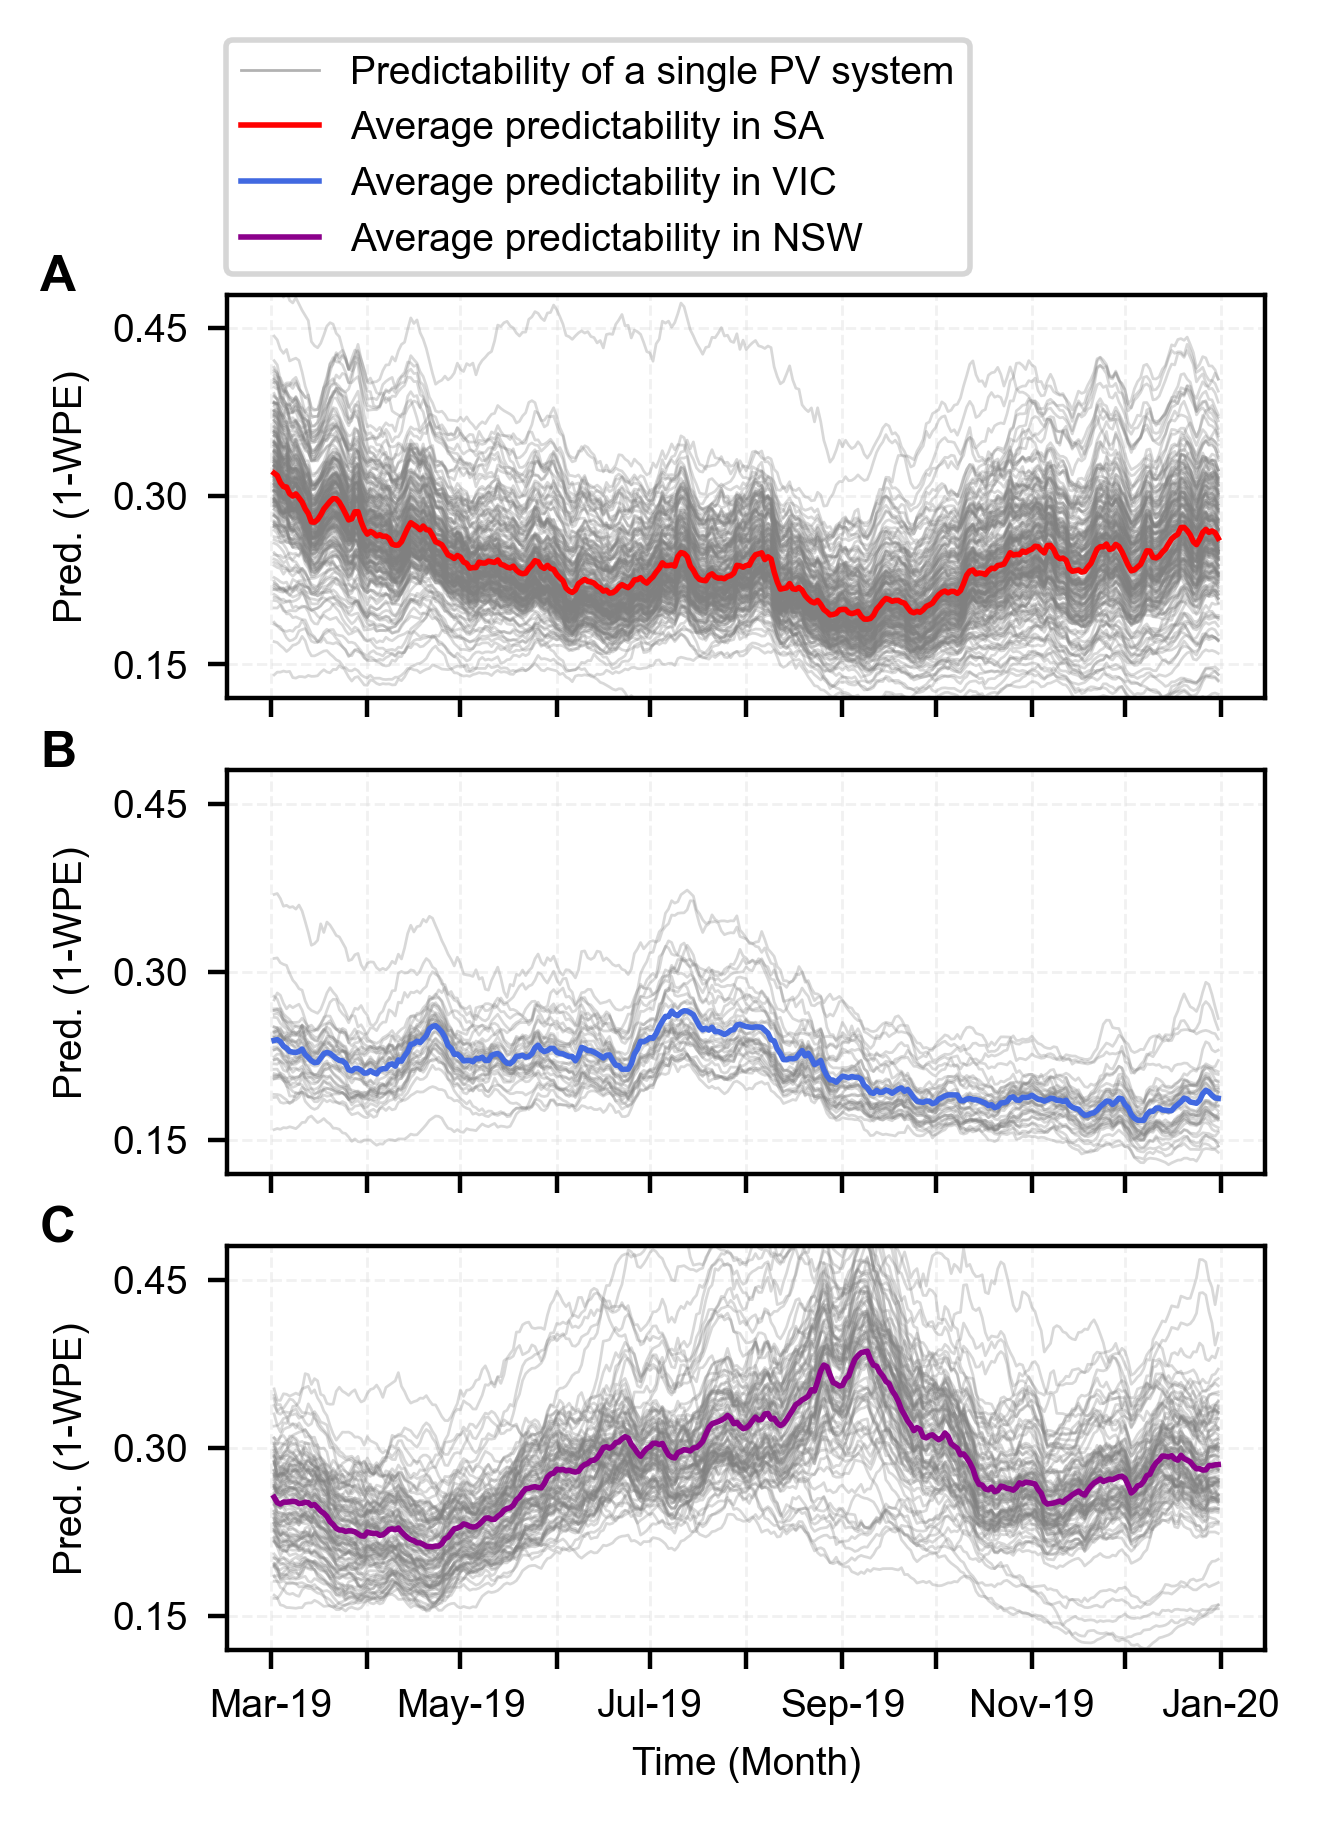

In [6]:
# Plotting Figure 12

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D

plt.style.use('default')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 7
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400

plt.figure(figsize=(3.35, 4.4))
plots = []

ax = plt.subplot2grid((3,1), (0,0))
temporary_df = wpe_over_time_df.copy()
selected_state = 'SA'
for site_id in wpe_over_time_df.columns:
    temporary_df[site_id] = 1 - temporary_df[site_id]
    if not site_id in site_details_df[site_details_df['state'] == selected_state].index:
        temporary_df = temporary_df.drop(columns=[site_id])

ax.plot(temporary_df, linewidth=0.5, color ='gray', alpha = 0.3)
ax.plot(temporary_df.mean(axis=1), color ='red', linewidth=1)

plt.xlabel('')
ax.axes.xaxis.set_ticklabels([])
plt.ylabel('Pred. (1-WPE)')

plt.minorticks_off()
plt.grid(color = 'gainsboro', linestyle = '--', linewidth = 0.5, alpha = 0.4)
plt.ylim([0.12, 0.48])
ax.set_yticks([0.15,0.30, 0.45])

x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
data_width = xmax - x0
data_height = ymax - y0
plt.text(x0 - data_width * 0.18 , ymax + data_height * 0.01,'A', weight='bold',  fontsize=9)

##################

ax = plt.subplot2grid((3,1), (1,0))
temporary_df = wpe_over_time_df.copy()

selected_state = 'VIC'
for site_id in wpe_over_time_df.columns:
    temporary_df[site_id] = 1 - temporary_df[site_id]
    if not site_id in site_details_df[site_details_df['state'] == selected_state].index:
        temporary_df = temporary_df.drop(columns=[site_id])

ax.plot(temporary_df, linewidth=0.5, color ='gray', alpha = 0.3)
ax.plot(temporary_df.mean(axis=1), color ='royalblue', linewidth=1)

plt.xlabel('')
ax.axes.xaxis.set_ticklabels([])
plt.ylabel('Pred. (1-WPE)')

plt.minorticks_off()
plt.grid(color = 'gainsboro', linestyle = '--', linewidth = 0.5, alpha = 0.4)
plt.ylim([0.12, 0.48])
ax.set_yticks([0.15,0.30, 0.45])


x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
data_width = xmax - x0
data_height = ymax - y0
plt.text(x0 - data_width * 0.18 , ymax + data_height * 0.01,'B', weight='bold',  fontsize=9)

#################

ax = plt.subplot2grid((3,1), (2,0))
temporary_df = wpe_over_time_df.copy()

selected_state = 'NSW'
for site_id in wpe_over_time_df.columns:
    temporary_df[site_id] = 1 - temporary_df[site_id]
    if not site_id in site_details_df[site_details_df['state'] == selected_state].index:
        temporary_df = temporary_df.drop(columns=[site_id])

ax.plot(temporary_df, linewidth=0.5, color ='gray', alpha = 0.3)
ax.plot(temporary_df.mean(axis=1), color ='darkmagenta', linewidth=1)

plt.xlabel('Time (Month)')
plt.ylabel('Pred. (1-WPE)')

plt.minorticks_off()
ax.axes.xaxis.set_ticklabels(['Mar-19', '', 'May-19', '', 'Jul-19', '', 'Sep-19', '', 'Nov-19', '', 'Jan-20'])
plt.grid(color = 'gainsboro', linestyle = '--', linewidth = 0.5, alpha = 0.4)
plt.ylim([0.12, 0.48])
ax.set_yticks([0.15,0.30, 0.45])

legend_elements = [Line2D([0], [0], color='gray', lw=0.5, label='Predictability of a single PV system', alpha = 0.6),
                   Line2D([0], [0], color='red', lw=1, label='Average predictability in SA'),
                   Line2D([0], [0], color='royalblue', lw=1, label='Average predictability in VIC'),
                   Line2D([0], [0], color='darkmagenta', lw=1, label='Average predictability in NSW')]

plt.legend(handles=legend_elements, loc =2, bbox_to_anchor=(-0.02, 4.04))

plt.subplots_adjust(wspace=0, hspace=0.18)


x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
data_width = xmax - x0
data_height = ymax - y0
plt.text(x0 - data_width * 0.18 , ymax + data_height * 0.01,'C', weight='bold',  fontsize=9)

plt.show()
#plt.savefig('Figure12.pdf',dpi=400, bbox_inches='tight')